# Matplotlib
A comprehensive library for creating static, animated, and interactive visualizations in Python.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

#### Index
1. <a href="#1.-Introduction">Introduction</a>
2. <a href="#2.-Figure's-Anatomy">Figure's Anatomy</a>
3. <a href="#3.-Types-of-inputs">Types of inputs</a>
4. <a href="#4.-Coding-styles">Coding styles</a>
    1. <a href="#4.1.-The-object-oriented-and-the-pyplot-interfaces">The object oriented and the pyplot interfaces</a>
    2. <a href="#4.2.-Making-a-helper-functions">Making a helper functions</a>
5. <a href="#5.-Styling-Artists">Styling Artists</a>
    1. <a href="#5.1.-Colors">Colors</a>
    2. <a href="#5.2.-Linewidths,-linestyles,-and-markersizes">Linewidths, linestyles, and markersizes</a>
6. <a href="#6.-Labelling-plots">Labelling plots</a>
    1. <a href="#6.1.-Axes-labels-and-text">Axes labels and text</a>
    2. <a href="#6.2.-Annotations">Annotations</a>
7. <a href="#7.-Axis-scales-and-ticks">Axis scales and ticks</a>
    1. <a href="#7.1.-Scales">Scales</a>
    2. <a href="#7.2.-Tick-locators-and-formatters">Tick locators and formatters</a>
    3. <a href="#7.3.-Plotting-dates-and-strings">Plotting dates and strings</a>
    4. <a href="#7.4.-Additional-Axis-objects">Additional Axis objects</a>
8. <a href="#8.-Color-mapped-data-(to-continue)">Color mapped data (to continue)</a>

## 1. Introduction

Matplotlib graphs your data on <a href="#Figures">Figures</a>, each of which can contain one or more <a href="#Axes">Axes</a>, an area where points can be specified in terms of _x-y_ coordinates (or _theta-r_ in a polar plot, _x-y-z_ in a 3D plot, etc). 

The simplest way of creating a Figure with an Axes is using `pyplot.subplots`. We can then use `Axes.plot` to draw some data on the Axes:

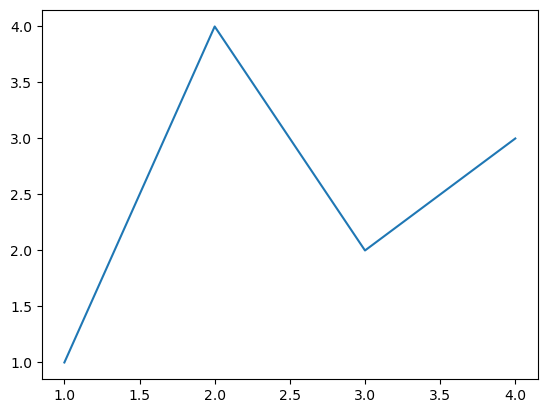

In [2]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.

## 2. Figure's Anatomy

![FiguresAnatomy](./FiguresAnatomy.png)

#### Figure
The **whole** figure. The Figure keeps track of all the child Axes, a group of 'special' Artists (titles, figure legends, colorbars, etc), and even nested subfigures.

The easiest way to create a new Figure is with pyplot:
```
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
```

#### Axes
An _Axes_ is an _Artist attached to a Figure that contains a region for plotting data, and usually includes two_ (or three in the case of 3D) _Axis objects_ (be aware of the difference between Axes and Axis) _that provide ticks and tick labels to provide scales for the data in the Axes_. Each Axes also has a **title** (set via `set_title()`), an **x-label** (set via `set_xlabel()`), and a **y-label** set via `set_ylabel()`).

#### Axis
These objects set the scale and limits and generate **ticks** (the marks on the Axis) and **ticklabels** (strings labeling the ticks). The location of the ticks is determined by a _Locator_ object and the ticklabel strings are formatted by a _Formatter_. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

#### Artist
Basically, _everything visible on the Figure_ (even Figure, Axes, and Axis objects). When the Figure is rendered, all of the Artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

## 3. Types of inputs

Plotting functions expect ***numpy.array*** or ***numpy.ma.masked_array*** as input (or objects that can be passed to **numpy.asarray**). Classes that are similar to arrays ('array-like') may not work as intended (matix, pandas objects, etc.). Common convention is to convert these to ***numpy.array objects*** prior to plotting. For example:
```
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)
```

Most methods will also _parse_ an _addressable_ object like a _dict_, a **numpy.recarray**, or a **pandas.DataFrame**. Matplotlib allows you provide the ___data keyword___ argument and generate plots passing the strings corresponding to the x and y variables.

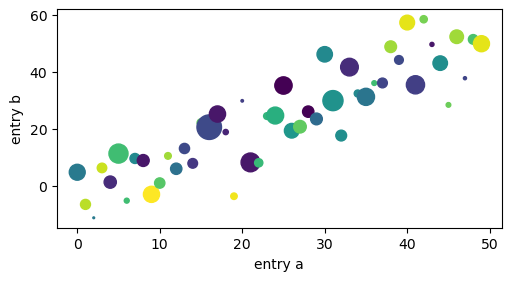

In [3]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b');

## 4. Coding styles

### 4.1. The object oriented and the pyplot interfaces
- Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style")

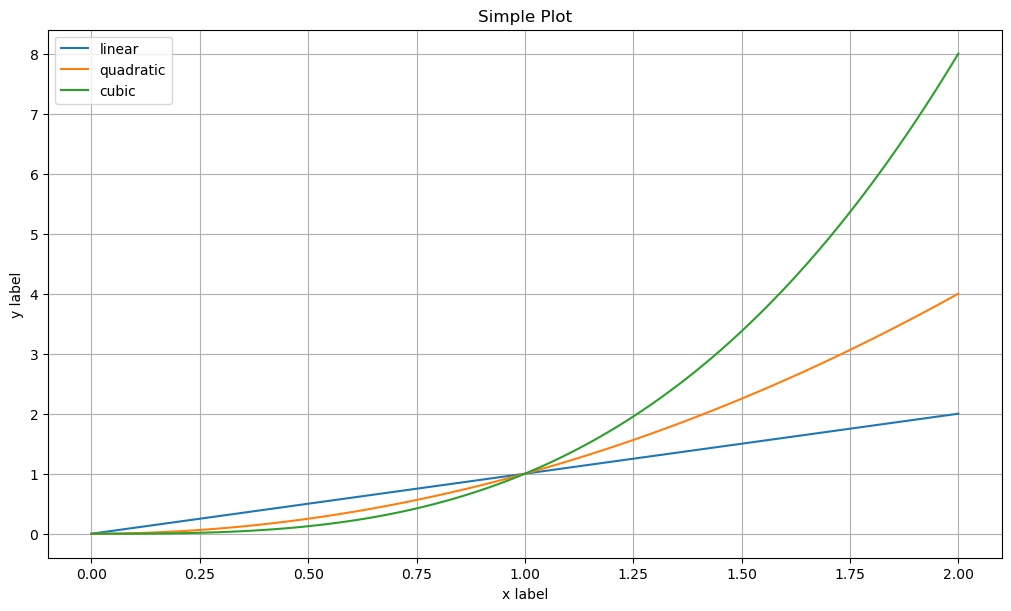

In [4]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.
ax.grid();  #Add Grid

- Rely on pyplot to automatically create and manage the Figures and Axes, and use pyplot functions for plotting

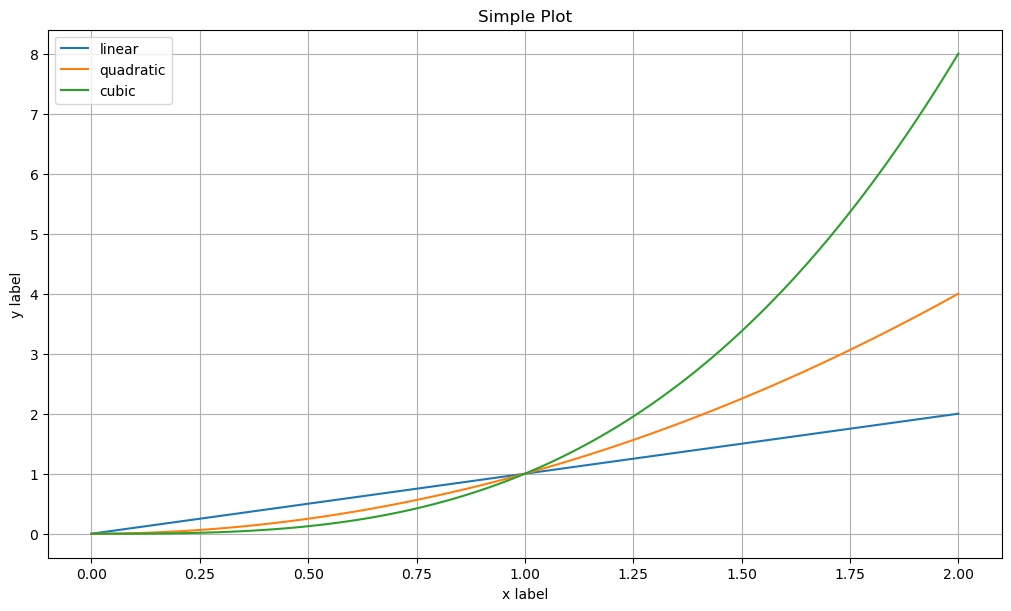

In [5]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(10, 6), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();
plt.grid();

There's also a third: <a href="https://matplotlib.org/stable/gallery/index.html#user-interfaces">Embedding Matplotlib in graphical user interfaces</a>

### 4.2. Making a helper functions

If you need to make the same plots over and over again with different data sets, or want to easily wrap Matplotlib methods, use the recommended signature function below.

In [6]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

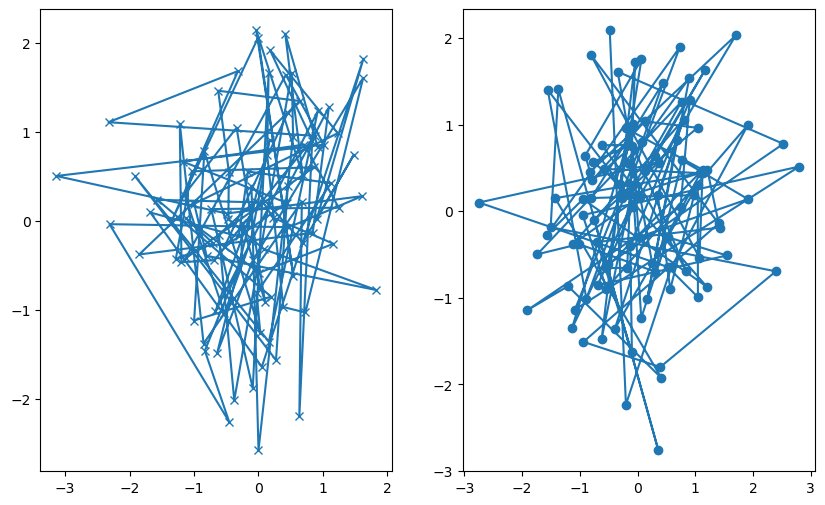

In [7]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

## 5. Styling Artists

In the plot below we manually set the **color**, **linewidth**, and **linestyle** of the Artists created by plot, and we set the **linestyle** of the second line after the fact with `set_linestyle`.

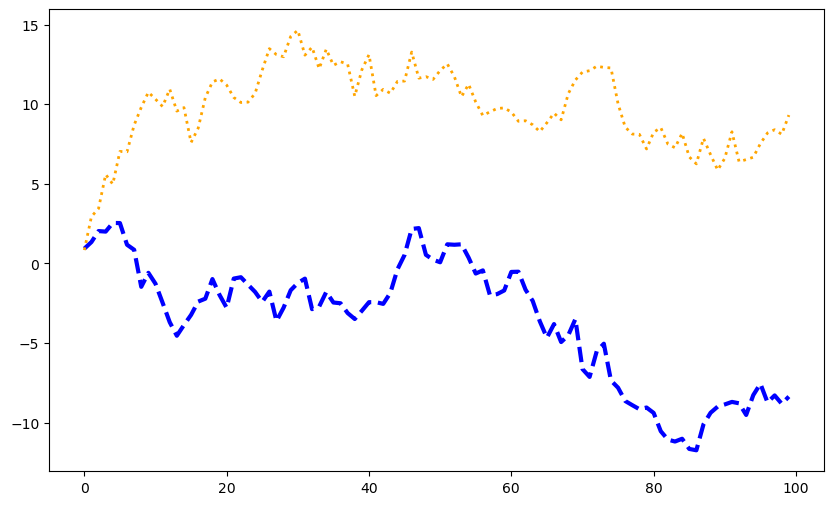

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(data1)) #from helper functions
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':');

The same but in relying on pyplot:

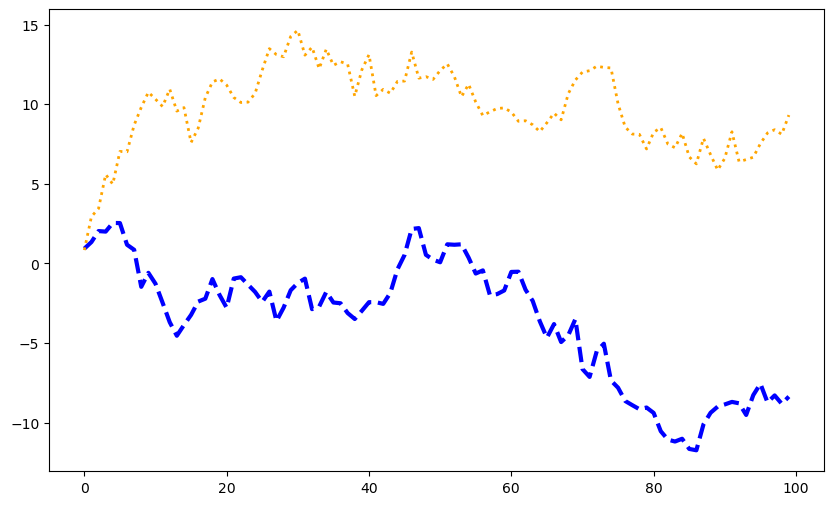

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
plt.plot(x, np.cumsum(data2), color='orange', linewidth=2, linestyle=':')

### 5.1. Colors

<a href="https://matplotlib.org/stable/tutorials/colors/colors.html">Specifying Colors</a>

Some Artists will take multiple colors. i.e. for a scatter plot, the edge of the markers can be different colors from the interior:

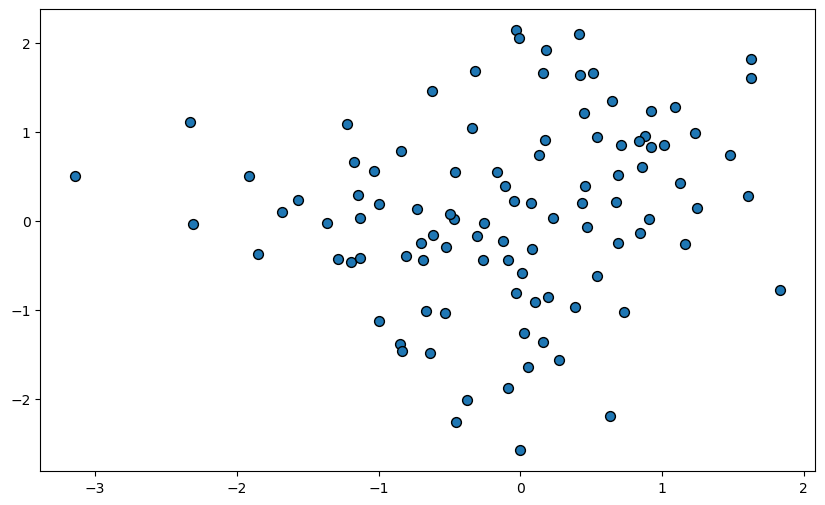

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k');

### 5.2. Linewidths, linestyles, and markersizes
<a href="https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html">Linestyles examples</a>

Marker size depends on the method being used. ***plot*** specifies markersize in points, and is generally the "diameter" or width of the marker. ***scatter*** specifies markersize as approximately proportional to the visual area of the marker. 

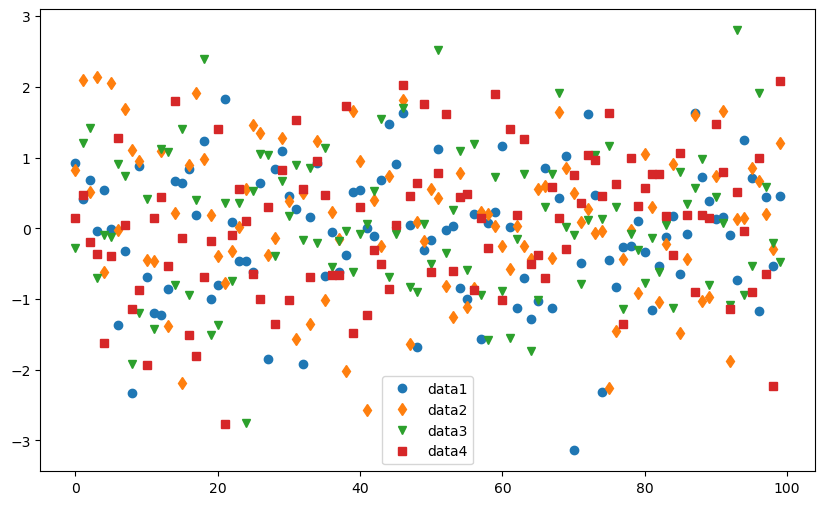

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend();

## 6. Labelling plots

### 6.1. Axes labels and text

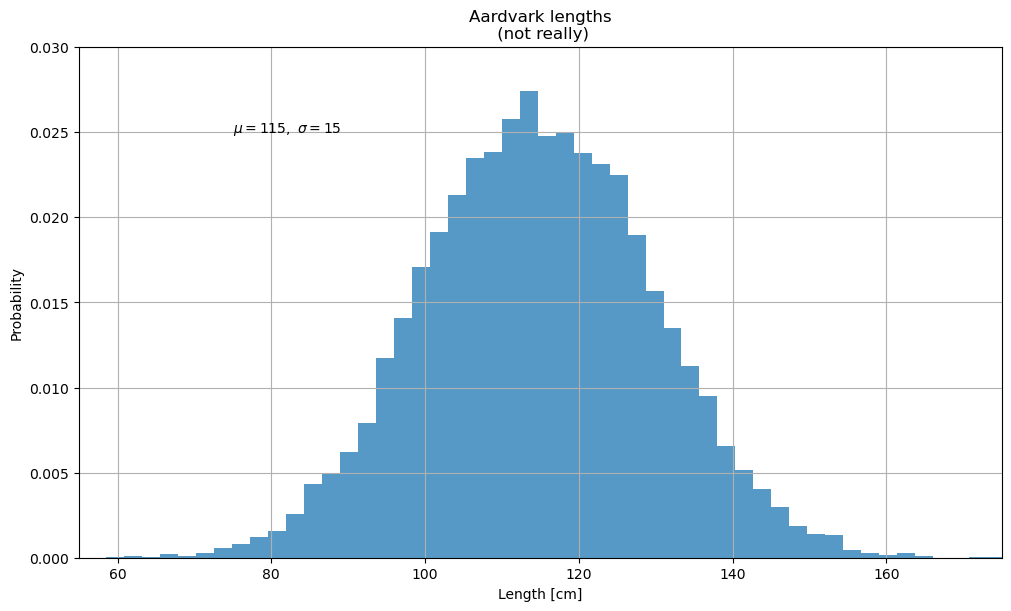

In [12]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=1, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]') # sets x label
ax.set_ylabel('Probability') # sets y label
ax.set_title('Aardvark lengths\n (not really)') # sets the title
ax.text(75, .025, r'$\mu=115,\ \sigma=15$') # add text (note LaTex is possible)
ax.axis([55, 175, 0, 0.03]) #determine x and y limits
ax.grid(True);

All of the text functions return a ***matplotlib.text.Text*** instance. Just as with lines above, you can customize the properties by passing keyword arguments into the text functions:
```
t = ax.set_xlabel('my data', fontsize=14, color='red')
```

### 6.2. Annotations

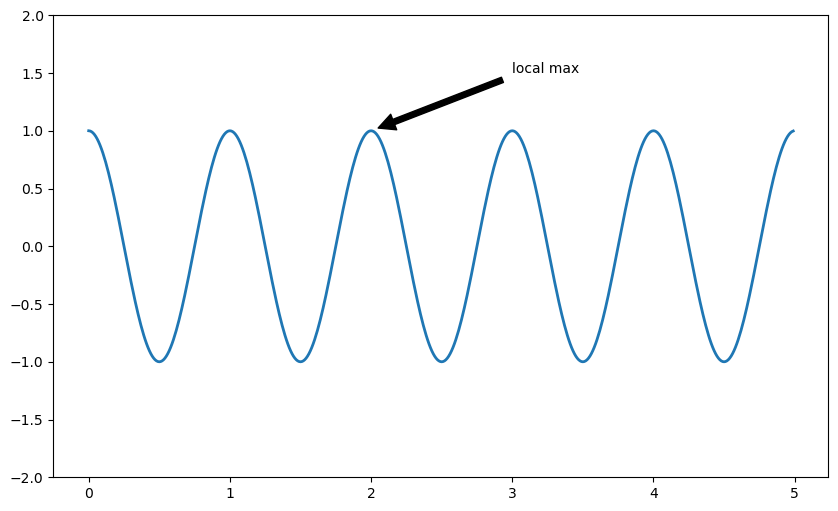

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2);

In this basic example, both ___xy___ and ___xytext___ are in _data coordinates_. There are a variety of other coordinate systems one can choose -- see <a href="https://matplotlib.org/stable/tutorials/text/annotations.html#annotations-tutorial">Basic Annotations</a> and <a href="https://matplotlib.org/stable/tutorials/text/annotations.html#plotting-guide-annotation">Advanced Annotations</a> for details. More examples also can be found in <a href="https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html">Annotating Plots</a>.

## 7. Axis scales and ticks

Each Axes has two (or three) Axis objects representing the x- and y-axis. These control the scale of the Axis, the tick locators and the tick formatters. Additional Axes can be attached to display further Axis objects.

### 7.1. Scales

In addition to the linear scale, Matplotlib supplies non-linear scales, such as a log-scale.

See <a href="https://matplotlib.org/stable/gallery/scales/scales.html">Scales</a>

Text(0.5, 1.0, 'Log Scale')

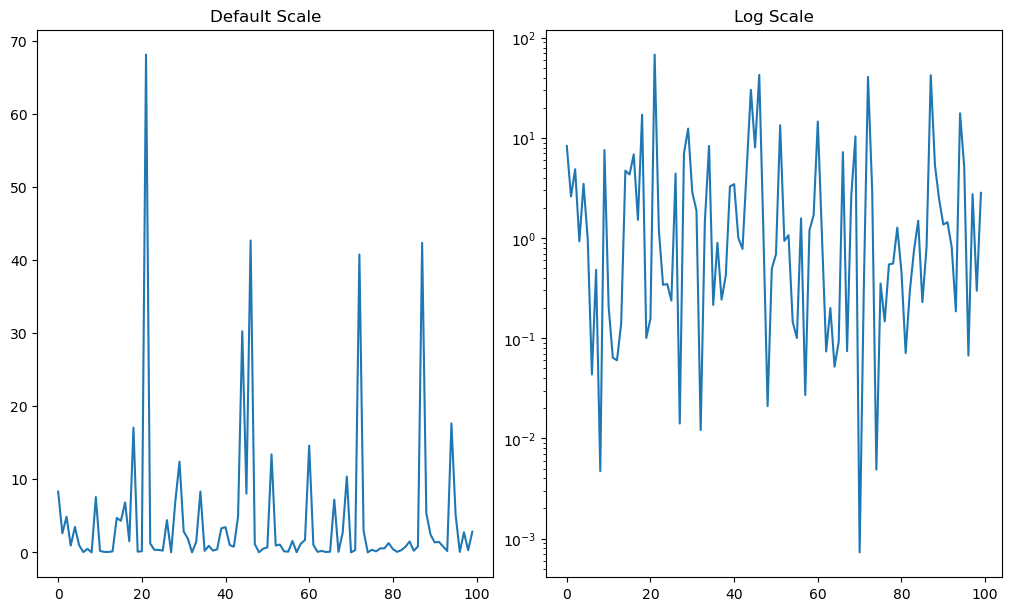

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)
axs[0].set_title("Default Scale")

axs[1].set_yscale('log')
axs[1].plot(xdata, data);
axs[1].set_title("Log Scale")

### 7.2. Tick locators and formatters

Each Axis has a tick locator and formatter that choose where along the Axis objects to put tick marks. A simple interface to this is `set_xticks` or `set_yticks`:

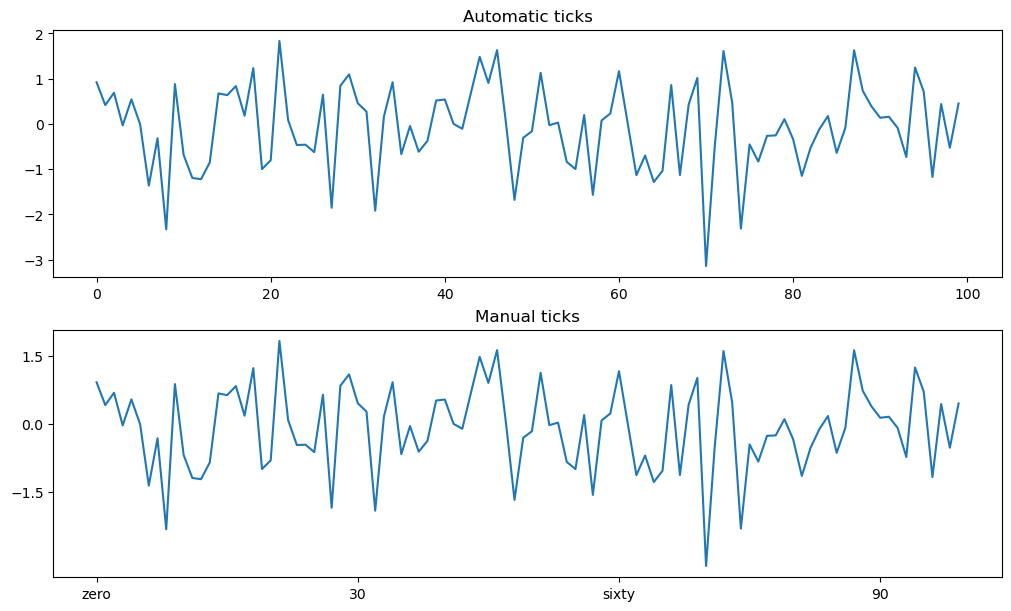

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6), layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks');

Different scales can have different locators and formatters; for instance the log-scale above uses LogLocator and LogFormatter

### 7.3. Plotting dates and strings
Matplotlib can handle plotting arrays of dates and arrays of strings, as well as floating point numbers. These get special locators and formatters as appropriate. For dates:

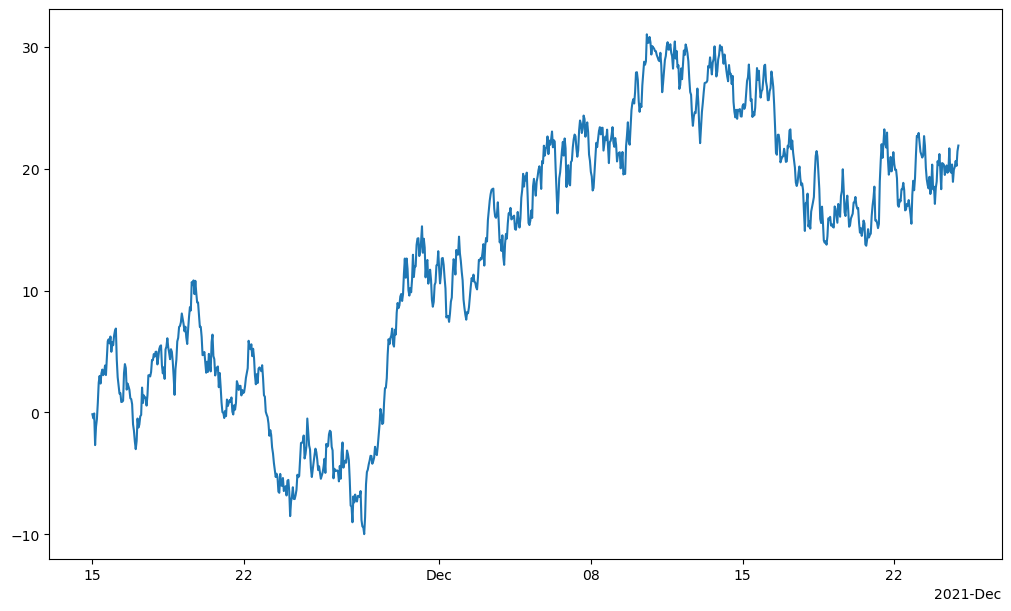

In [16]:
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf);

For strings, we get categorical plotting

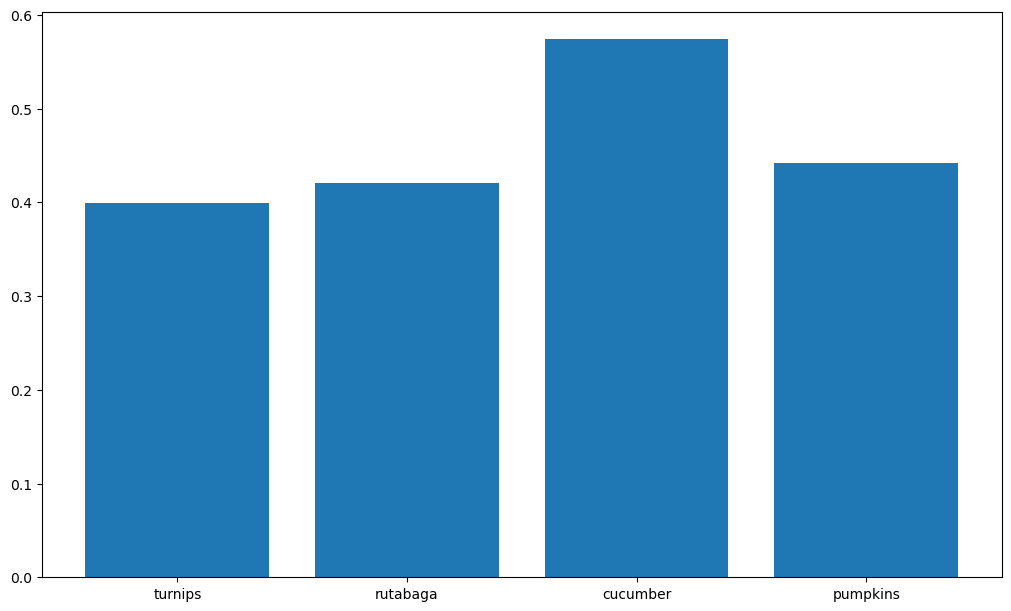

In [17]:
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)));

### 7.4. Additional Axis objects

Plotting data of different magnitude in one chart may require an additional _y-axis_. Such an Axis can be created by using ***twinx*** to add a new Axes with an invisible _x-axis_ and a _y-axis_ positioned at the right (analogously for twiny).

Similarly, you can add a _secondary_xaxis_ or _secondary_yaxis_ having a different scale than the main Axis to represent the data in different scales or units.

Text(0.5, 0, 'Angle [rad]')

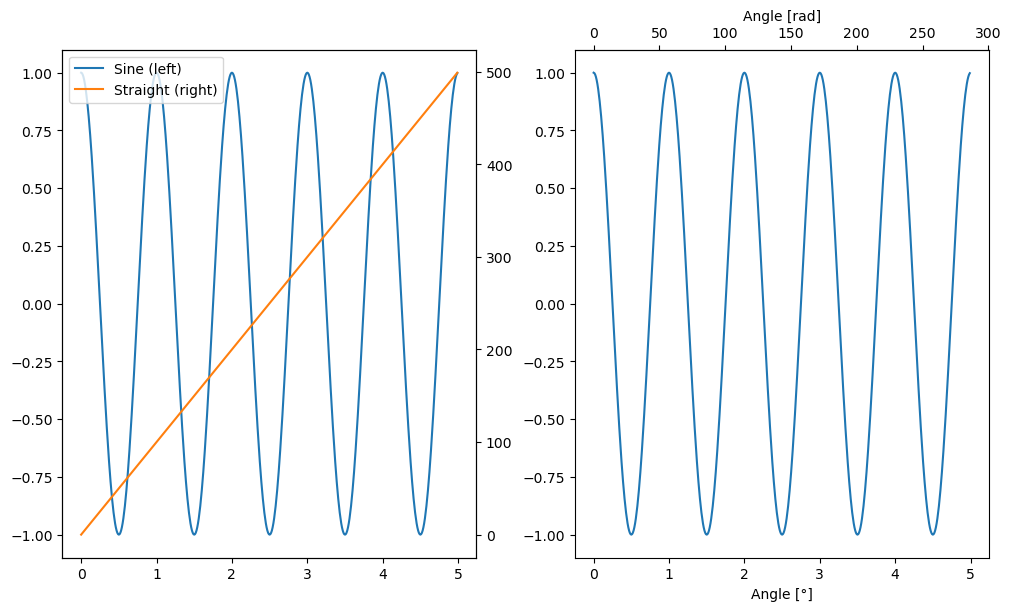

In [18]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10, 6), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [°]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [rad]')

## 8. Color mapped data (to continue)

<a href="https://matplotlib.org/stable/tutorials/introductory/usage.html#color-mapped-data">continuar desde aquí</a>

Often we want to have a third dimension in a plot represented by a colors in a colormap. Matplotlib has a number of plot types that do this:

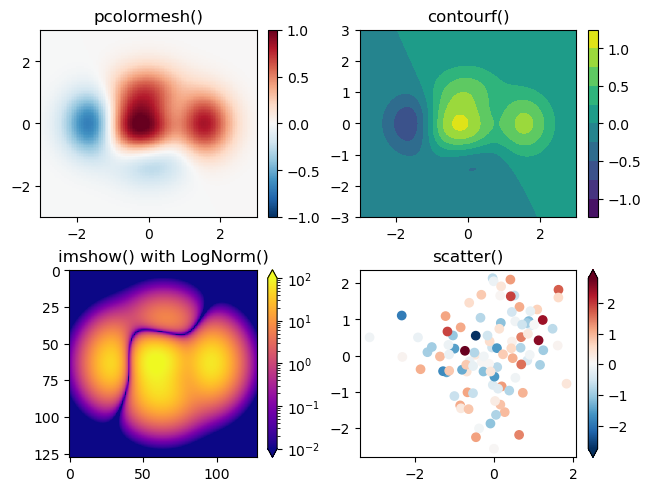

In [19]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()');

---
## Glossary

#### Figures

The top level container for all the ___plot elements___. <a href="https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure">See more</a>.

The Figure instance supports callbacks through a callbacks attribute which is a __CallbackRegistry__ instance. The events you can connect to are ___'dpi_changed'___, and the callback will be called with **func(fig)** where _fig_ is the _Figure_ instance.

#### Axes
The Axes contains most of the figure elements: Axis, Tick, Line2D, Text, Polygon, etc., and sets the coordinate system. <a href="https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes">See more</a>.

The Axes instance supports callbacks through a callbacks attribute which is a __CallbackRegistry__ instance. The events you can connect to are ___'xlim_changed'___ and ___'ylim_changed'___ and the callback will be called with **func(ax)** where _ax_ is the _Axes_ instance.